In [0]:
%tensorflow_version 2.x 

import tensorflow as tf

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
import pandas as pd

from __future__ import absolute_import, division, print_function, unicode_literals

from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline
!wget "https://www.dictionary.com/e/wp-content/uploads/2017/09/green_shades16.jpg" -O dt.jpg
#dfeval = pd.read_csv('https://raw.githubusercontent.com/codebrainz/color-names/master/output/colors.csv')
#dfeval.head()

--2020-04-09 16:20:40--  https://www.dictionary.com/e/wp-content/uploads/2017/09/green_shades16.jpg
Resolving www.dictionary.com (www.dictionary.com)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to www.dictionary.com (www.dictionary.com)|151.101.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48528 (47K) [image/jpeg]
Saving to: ‘dt.jpg’

dt.jpg              100%[===================>]  47.39K  --.-KB/s    in 0.05s   

2020-04-09 16:20:40 (927 KB/s) - ‘dt.jpg’ saved [48528/48528]



Shape: (700, 1000, 3)


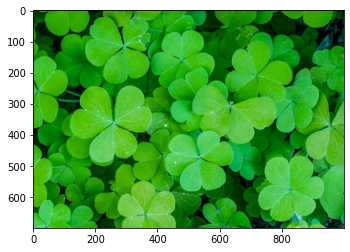

In [0]:
image = cv2.imread('./dt.jpg', 1)
print("Shape: {}".format(image.shape)) 
#first two values are pixels and 3rd value is RGB 
plt.imshow(image)

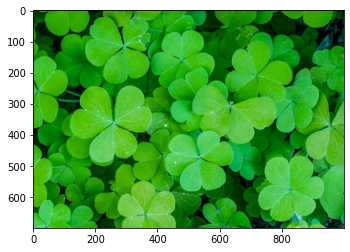

In [0]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [0]:

modified_image = cv2.resize(image2, (700, 350))
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
clf = KMeans(n_clusters = 1)
labels = clf.fit_predict(modified_image)
center_colors = clf.cluster_centers_

for color in center_colors:
  centralized_color=color
print(centralized_color[0])


31.381171428549965


In [0]:
COLOR=['NAN','RED','ORANGE','GOLD','PEACH','PINK','YELLOW','GREEN','BLUE','WHITE','BLACK']
train = pd.read_csv('https://raw.githubusercontent.com/Roastedalmonds/ML_home/master/rgbCol.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Roastedalmonds/ML_home/master/rgbCol.csv')

train_y = train.pop('Color')
test_y = test.pop('Color')
train_y

0      1
1      1
2      1
3      1
4      1
      ..
65    10
66    10
67    10
68    10
69    10
Name: Color, Length: 70, dtype: int64

In [0]:
def input_fn(features, labels, training=True, batch_size=120):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
  if training:
    dataset = dataset.shuffle(1500).repeat()
  return dataset.batch(batch_size)


In [0]:
my_feature_columns=[]
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='Red', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Green', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Blue', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [0]:
classifier = tf.estimator.DNNClassifier( feature_columns=my_feature_columns,hidden_units=[30, 10],n_classes=11)

classifier.train(input_fn=lambda: input_fn(train, train_y, training=True),steps=6000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsahd1yfm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Varia

In [0]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(train, train_y, training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-09T16:20:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsahd1yfm/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.20439s
INFO:tensorflow:Finished evaluation at 2020-04-09-16:20:53
INFO:tensorflow:Saving dict for global step 6000: accuracy = 0.8, average_loss = 0.7577261, global_step = 6000, loss = 0.7577261
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: /tmp/tmpsahd1yfm/model.ckpt-6000
{'accuracy': 0.8, 'average_loss': 0.7577261, 'loss': 0.7577261, 'global_step': 6000}


In [0]:
def input_fn(features, batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['Red', 'Green', 'Blue']
predict = {}
i=0
for feature in features:
  predict[feature] = [float(centralized_color[i])]
  i+=1
'''
print("Please type numeric values as prompted.")
for feature in features: 
  val = input(feature + ": ")
    
  predict[feature] = [float(val)]
'''
predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]

  print('Prediction is "{}" ({:.1f}%)'.format(COLOR[class_id], 100 * probability))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsahd1yfm/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "GREEN" (86.9%)
